In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
cmap=sns.light_palette("seagreen",as_cmap=True)

In [3]:
unfair = pd.read_csv('adult-result/unfair_lr-100.csv', index_col=0)
zhang = pd.read_csv('adult-result/zhang-100.csv', index_col=0)
laftr = pd.read_csv('adult-result/laftr-100.csv', index_col=0)

In [4]:
unfair

,model_name,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,UnfairLR-decay,0.840093,0.802288,0.857657,0.803726,0.820755,0.848784,0.821507,1737.0,21.0,125.0,76.0,2519.0,281.0,535.0,722.0
1,UnfairLR,0.850731,0.818181,0.911527,0.894098,0.834139,0.880081,0.871876,1714.0,44.0,99.0,102.0,2531.0,269.0,486.0,771.0


In [5]:
zhang

,model_name,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,Zhang4DP,0.850066,0.811667,0.902038,0.880965,0.830423,0.875281,0.865240,1718.0,40.0,101.0,100.0,2521.0,279.0,482.0,775.0
1,Zhang4EqOdds,0.850399,0.812160,0.902395,0.880965,0.830840,0.875626,0.865412,1718.0,40.0,101.0,100.0,2523.0,277.0,482.0,775.0
2,Zhang4EqOpp,0.850399,0.816139,0.906203,0.884943,0.832917,0.877414,0.867327,1716.0,42.0,101.0,100.0,2530.0,270.0,487.0,770.0


In [6]:
laftr

,model_name,fair_coeff,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,LAFTR4DP,0.2,0.850233,0.818917,0.942081,0.960377,0.834281,0.893804,0.901955,1703.0,55.0,82.0,119.0,2499.0,301.0,463.0,794.0
1,LAFTR4DP,0.5,0.850399,0.832913,0.965804,0.997981,0.841565,0.904435,0.918298,1697.0,61.0,77.0,124.0,2517.0,283.0,479.0,778.0
2,LAFTR4DP,0.7,0.848238,0.855747,0.954423,0.959451,0.851976,0.898203,0.900423,1690.0,68.0,75.0,126.0,2550.0,250.0,520.0,737.0
3,LAFTR4DP,1.0,0.846742,0.870077,0.951554,0.940750,0.858251,0.896094,0.891274,1676.0,82.0,73.0,128.0,2564.0,236.0,531.0,726.0
4,LAFTR4EqOdds,0.2,0.849069,0.847931,0.958040,0.973379,0.848500,0.900269,0.906984,1698.0,60.0,77.0,124.0,2544.0,256.0,515.0,742.0
5,LAFTR4EqOdds,0.5,0.849069,0.847931,0.958040,0.973379,0.848500,0.900269,0.906984,1698.0,60.0,77.0,124.0,2544.0,256.0,515.0,742.0
6,LAFTR4EqOdds,0.7,0.849069,0.847931,0.958040,0.973379,0.848500,0.900269,0.906984,1698.0,60.0,77.0,124.0,2544.0,256.0,515.0,742.0
7,LAFTR4EqOdds,1.0,0.849069,0.847931,0.958040,0.973379,0.848500,0.900269,0.906984,1698.0,60.0,77.0,124.0,2544.0,256.0,515.0,742.0
8,LAFTR4EqOpp,0.2,0.845911,0.864881,0.949424,0.939942,0.855291,0.894683,0.890451,1667.0,91.0,69.0,132.0,2540.0,260.0,507.0,750.0
9,LAFTR4EqOpp,0.5,0.845911,0.864881,0.949424,0.939942,0.855291,0.894683,0.890451,1667.0,91.0,69.0,132.0,2540.0,260.0,507.0,750.0


## Plotting Accuracies

In [7]:
model_names = [unfair['model_name'][0]]
model_names += (laftr['model_name'] + '-' + laftr['fair_coeff'].astype(str)).to_list()
model_names += zhang['model_name'].to_list()

In [8]:
model_names

['UnfairLR-decay',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0',
 'Zhang4DP',
 'Zhang4EqOdds',
 'Zhang4EqOpp']

In [9]:
model_accs = [unfair['clas_acc'][0]]+laftr['clas_acc'].to_list()+zhang['clas_acc'].to_list()

No handles with labels found to put in legend.


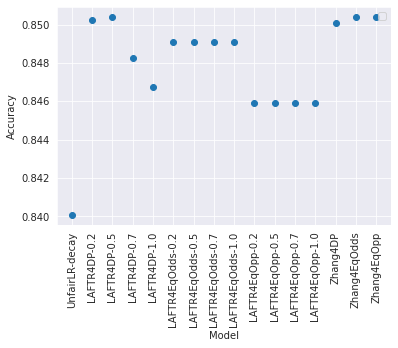

In [10]:
plt.plot()
plt.ylabel('Accuracy')

plt.scatter(model_names, model_accs)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Demographic Disparities

In [11]:
model_dps = [unfair['dp'][0]]+laftr['dp'].to_list()+zhang['dp'].to_list()

No handles with labels found to put in legend.


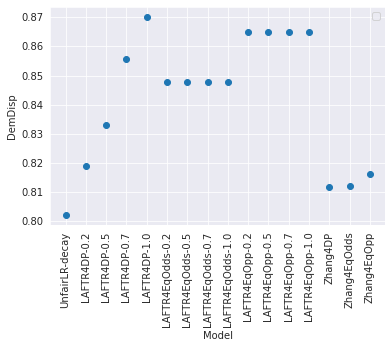

In [12]:
plt.plot()
plt.ylabel('DemDisp')

plt.scatter(model_names, model_dps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Odds

No handles with labels found to put in legend.


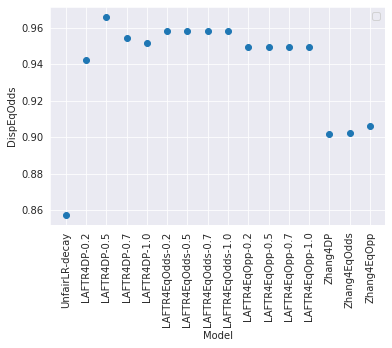

In [13]:
model_deqodds = [unfair['deqodds'][0]]+laftr['deqodds'].to_list()+zhang['deqodds'].to_list()
plt.plot()
plt.ylabel('DispEqOdds')

plt.scatter(model_names, model_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Opp

No handles with labels found to put in legend.


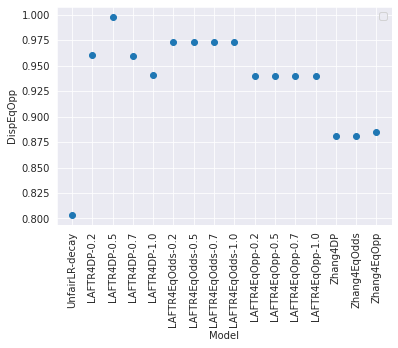

In [14]:
model_deqopps = [unfair['deqopp'][0]]+laftr['deqopp'].to_list()+zhang['deqopp'].to_list()
plt.plot()
plt.ylabel('DispEqOpp')

plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DemDisp

No handles with labels found to put in legend.


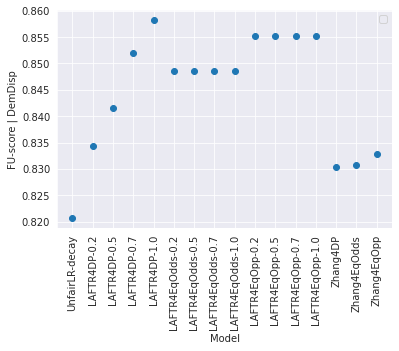

In [15]:
model_trade_dp = [unfair['trade_dp'][0]]+laftr['trade_dp'].to_list()+zhang['trade_dp'].to_list()
plt.plot()
plt.ylabel('FU-score | DemDisp')

plt.scatter(model_names, model_trade_dp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOdds

No handles with labels found to put in legend.


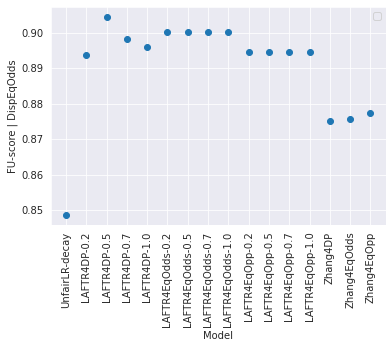

In [16]:
model_trade_deqodds = [unfair['trade_deqodds'][0]]+laftr['trade_deqodds'].to_list()+zhang['trade_deqodds'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOdds')

plt.scatter(model_names, model_trade_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOpp

No handles with labels found to put in legend.


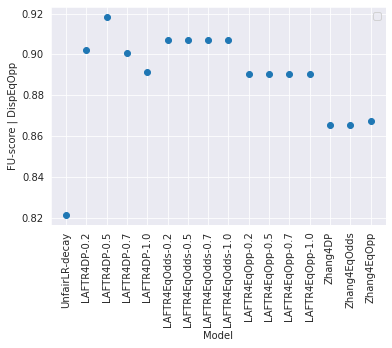

In [17]:
model_trade_deqopp = [unfair['trade_deqopp'][0]]+laftr['trade_deqopp'].to_list()+zhang['trade_deqopp'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOpp')

plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Acc x DemDisp

In [18]:
'''cmap=sns.light_palette("seagreen")#,as_cmap=True)
cmap'''

'cmap=sns.light_palette("seagreen")#,as_cmap=True)\ncmap'

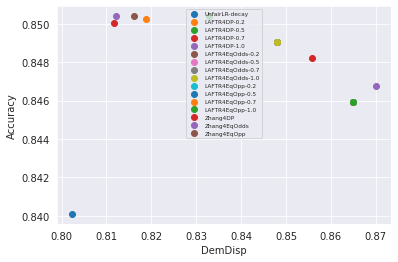

<Figure size 504x504 with 0 Axes>

In [19]:
plt.plot()
#sns.light_palette("seagreen",as_cmap=True)

#fig, ax = plt.scatter(model_dps, model_accs)#, label = "ZHANG DemPar")
'''fig, ax = plt.subplots()
ax.scatter(model_dps, model_accs)'''

plt.xlabel('DemDisp')
plt.ylabel('Accuracy')

for i, model_name in enumerate(model_names):
    plt.scatter(model_dps[i], model_accs[i], label=model_name)#, color=cmap[i])
plt.legend(loc='upper center', fontsize='xx-small')
plt.figure(figsize=(7,7))

plt.show()

## Plotting Acc x DispEqOdds

## Plotting Acc x DispEqOpp

# Pro artigo

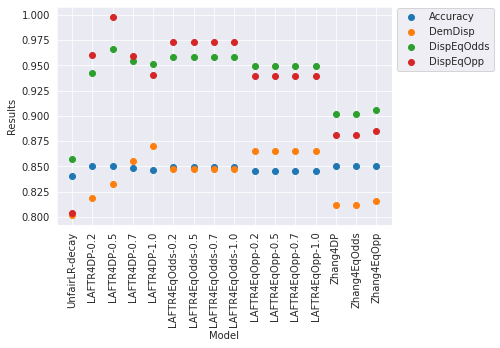

In [20]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_accs)
plt.scatter(model_names, model_dps)
plt.scatter(model_names, model_deqodds)
plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['Accuracy', 'DemDisp', 'DispEqOdds', 'DispEqOpp'], bbox_to_anchor=(1.32,1.02), loc="upper right")
plt.show()

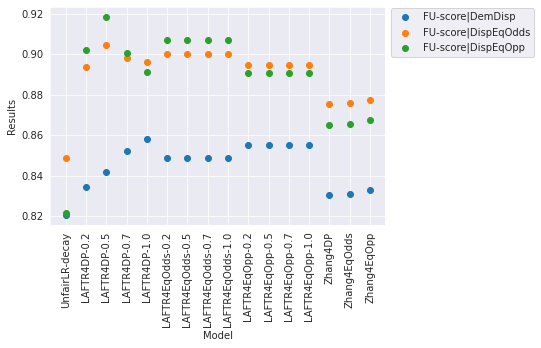

In [21]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_trade_dp)
plt.scatter(model_names, model_trade_deqodds)
plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['FU-score|DemDisp', 'FU-score|DispEqOdds', 'FU-score|DispEqOpp'], bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.show()